In [1]:
!pip install mplsoccer


In [3]:
import mplsoccer
print(mplsoccer.__version__)


1.4.0


In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sea

In [19]:
data =pd.read_csv('shotmaps.csv')

In [21]:
data


,minute,second,team,x,y,outcome
0,21,42,Barcelona,50.88,85.20,Saved
1,29,33,Barcelona,34.96,91.68,Missed
2,35,3,Barcelona,44.40,101.64,Saved
3,41,3,Barcelona,27.92,96.36,Saved
4,42,9,Barcelona,50.40,104.88,Saved
5,42,13,Barcelona,21.60,108.00,Missed
6,45,32,Barcelona,47.84,107.64,Saved
7,46,51,Barcelona,47.04,89.76,Saved
8,57,31,Barcelona,48.64,107.04,Post
9,60,12,Barcelona,33.76,101.64,Missed


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   minute   20 non-null     int64  
 1   second   20 non-null     int64  
 2   team     20 non-null     object 
 3   x        20 non-null     float64
 4   y        20 non-null     float64
 5   outcome  20 non-null     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [67]:
data.describe()

,minute,second,x,y
count,20.000000,20.000000,20.000000,20.000000
mean,59.250000,26.100000,41.276000,98.226000
std,20.606271,19.726819,9.641995,7.137144
min,21.000000,3.000000,21.600000,85.200000
25%,42.000000,9.000000,34.660000,91.620000
50%,62.000000,22.000000,43.240000,98.280000
75%,77.750000,44.250000,49.080000,104.250000
max,89.000000,58.000000,54.560000,108.000000


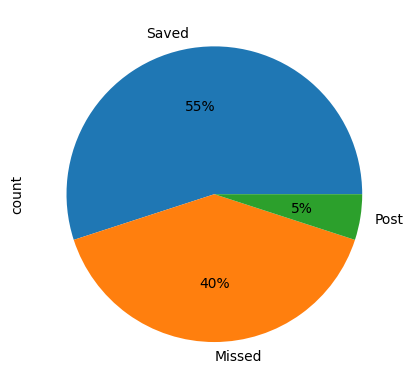

In [81]:
data['outcome'].value_counts().plot(kind="pie",autopct="%.0f%%")
plt.show()

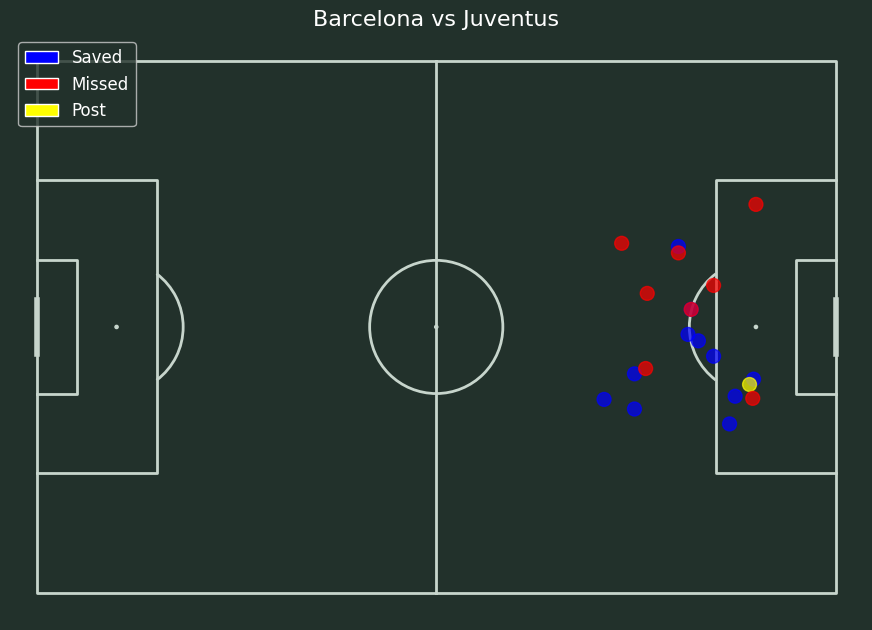

In [79]:
from matplotlib.patches import Patch

color_map = {
    'Saved': 'blue',
    'Missed': 'red',
    'Post': 'yellow'
}
colors = data['outcome'].map(color_map)

# Set figure with vertical dimensions
fig, ax = plt.subplots(figsize=(11, 16))
fig.set_facecolor('#22312b')
ax.set_facecolor('#22312b')

# Create and draw the pitch
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
pitch.draw(ax=ax)

# Plot points with mapped colors (swapping x/y to simulate vertical pitch)
pitch.scatter(data['y'], data['x'], ax=ax, s=100, color=colors, alpha=.7)

# Add legend manually
legend_elements = [
    Patch(facecolor='blue', edgecolor='white', label='Saved'),
    Patch(facecolor='red', edgecolor='white', label='Missed'),
    Patch(facecolor='yellow', edgecolor='white', label='Post')
]
ax.legend(handles=legend_elements, loc='upper left', fontsize=12, facecolor='#22312b', labelcolor='white')

# Title
plt.title("Barcelona vs Juventus", color='white', fontsize=16)
plt.show()